In [1]:
import pandas as pd # Biblioteca usada para acessar DataFrames e gerar estatísticas
import numpy as np # Biblioteca científica p'ra cálculo de média, desvio padrão,
                   # vetores, manipulação de matrizes
from pandas_datareader import data # Carregar dados financeiros on-line (tens de instalar no prompt antes)
import matplotlib.pyplot as plt # Bíbli de vizualização padrão no Python
import seaborn as sbn # Bíbli com gráficos mais avançados e atraentes

In [2]:
ações = ['GOLL4.SA', 'KLBN3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
# Criando uma lista com o nome das ações que serão usadas

In [3]:
ações_df = pd.DataFrame()
for ação in ações: # Criando um loop para percorrer a lista com o nome das ações e obter o resultado
    ações_df[ação] = data.DataReader(name = ação, data_source='yahoo', start='2020-01-01')['Close']
    # ['Close'] no final indica o parâmetro passado para pegar somente a coluna de Fachamento das ações

In [4]:
ações_df = ações_df.rename(columns={'GOLL4.SA':'Gol', 'KLBN3.SA':'Klabin', 'WEGE3.SA':'Wege',
                                    'MGLU3.SA':'Magalu', 'TOTS3.SA':'Totvs', 'BOVA11.SA':'B3'})    
# Renomeando as ações para facilitar a leitura e a digitação

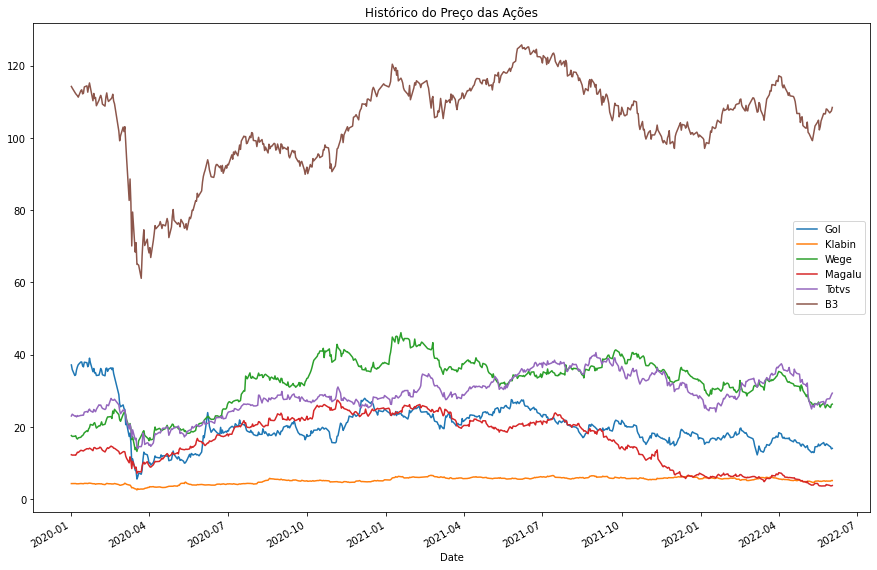

In [5]:
ações_df.plot(figsize = (15,10), title = 'Histórico do Preço das Ações');
# Caso a Data venha como uma coluna na hora de pegar os dados, posso escolher o eixo x passando o nome
# ficando assim x='Data ou Date'

##### Obs.:
       Irei normalizar o valor das ações para saber qual foi o desempenho de cada ação, já que todas começam com preços diferentes.
       O cálculo consiste em dividir o valor da ação pelo valor que estava no primeiro dia que foi puxado os dados, fazendo assim que todas comecem partindo no número 1 e com isso fica mais fácil visualizar o desempenho.

In [6]:
ações_df_normalizado = ações_df.copy()
    # Fazendo uma cópia dos dados e renomeando de ações_df_normalizado
for i in ações_df_normalizado.columns:
        # Percorrendo todas as colunas dessa nova cópia
    ações_df_normalizado[i] = ações_df_normalizado[i] / ações_df_normalizado[i][0]
        # i = as linhas a serem percorridas
        # 0 = para que a divisão fique travada sempre no primeiro valor de cada coluna

In [7]:
ações_df_normalizado
# Conferindo a nova tabela

,Gol,Klabin,Wege,Magalu,Totvs,B3
Date,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.965833,1.002304,0.987230,0.991080,1.021258,0.996149
2020-01-06,0.921442,1.002304,0.989784,0.991891,0.997975,0.985557
2020-01-07,0.926823,1.002304,0.997446,0.989053,1.002169,0.982493
2020-01-08,0.963411,0.986175,0.959705,1.019461,0.988720,0.979954
...,...,...,...,...,...,...
2022-05-27,0.409470,1.158986,1.488082,0.324346,1.204338,0.944503
2022-05-30,0.394135,1.163594,1.449489,0.311372,1.206941,0.935924
2022-05-31,0.390369,1.158986,1.439841,0.301642,1.230803,0.938200


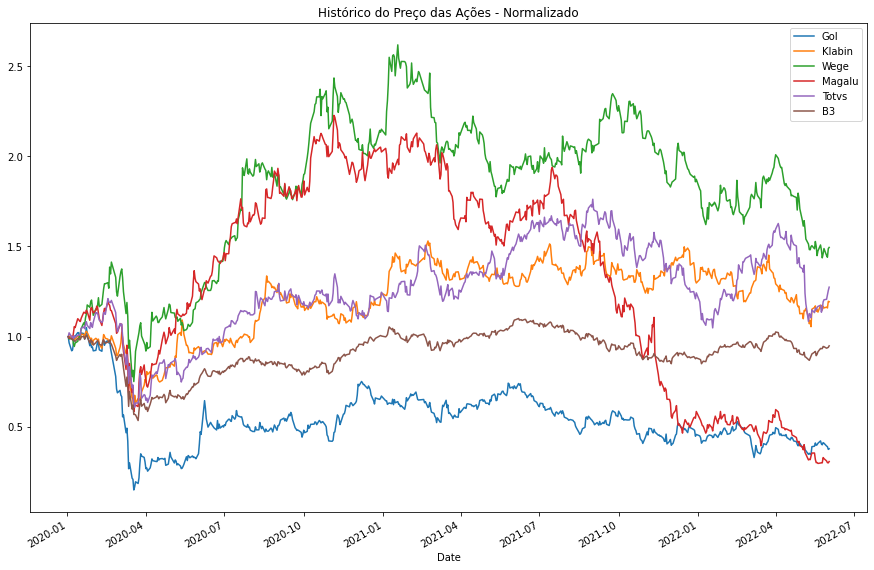

In [8]:
ações_df_normalizado.plot(figsize = (15,10), title = 'Histórico do Preço das Ações - Normalizado');
# Mostrando o gráfico normalizado para análise de desempenho de cada ação